In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import seaborn as sms
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import datetime
import seaborn as sns
sns.set()

In [2]:
os.getcwd()

'c:\\Users\\gunja\\Documents\\DS and ML\\ML\\GoldPricePrediction'

In [3]:
df = pd.read_csv('archive/gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
### data collection and processing

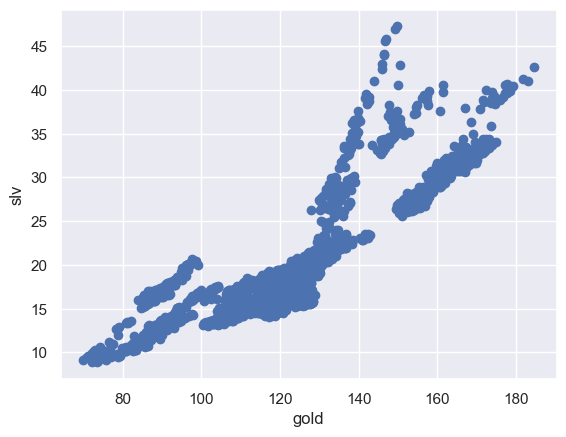

In [5]:
plt.scatter(df['GLD'],df['SLV'])
plt.xlabel('gold')
plt.ylabel('slv')
plt.show()

In [6]:
df.shape

(2290, 6)

In [7]:
df.size

13740

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
### getting correlations 

In [12]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [13]:
correlation = df.corr()
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [14]:
X = df.drop(['GLD','Date'],axis =1)
y = df['GLD']


In [15]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 45)

In [16]:
## regression check

In [17]:
regressor = RandomForestRegressor(n_estimators = 100)

In [18]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [19]:
test_predection  = regressor.predict(x_test)

In [20]:
test_predection

array([116.49470081,  88.1706985 , 127.81540045, 154.69720176,
       125.28840093, 124.51740068, 153.47300137, 120.79230034,
       142.95270112, 127.70440188, 106.44470112, 114.36270009,
       120.33840112, 106.63019866, 139.50560421,  94.61850043,
       164.62630049, 155.6307031 , 166.94899868, 149.76550207,
        88.4996994 , 116.77900016, 126.83230045, 114.44920038,
       176.34159955, 127.92630149, 150.21810213, 125.07109986,
       123.37589934, 126.64229957, 160.02350023, 108.5930992 ,
       117.83779917, 133.96670233, 115.09610198, 115.03220089,
       113.00049983, 119.6683    , 110.15510152, 153.48950145,
       133.12150078, 130.28530269, 117.47660056, 107.03329849,
       139.67380044, 118.19140033, 161.01530477, 168.20950192,
       122.56099941, 123.72959939, 114.17520035, 106.75219867,
       104.93360174, 123.4079997 , 124.20140035, 125.01660087,
       115.41479921, 156.56349785, 110.14209995,  89.40470022,
       105.51980062, 118.43770141, 111.97309998, 161.60

In [21]:
#### error prediction 

In [22]:
error = metrics.r2_score(y_test,test_predection)

In [23]:
error * 100

98.93014106622844